In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings("ignore")

import wrangle
import split_scale
import evaluate


# Exercises


Using the data on student grades from this lesson, complete the following:

1. Split the data into train and test datasets.

2. Create a model that uses exam 1 to predict the final grade.

3. Create a model that uses exam 2 to predict the final grade.

In [2]:
# wrangle the data
df = wrangle.wrangle_grades()
df.head()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97


In [3]:
import sklearn.model_selection

# split into train and test
train, test = sklearn.model_selection.train_test_split(df, train_size=.8, random_state=7)

### Using exam1 to predict final_grade

In [4]:
# goal is to model using exam1 to predict final_grade
predictions = pd.DataFrame({
    'actual': train.final_grade
})
# actual is actually the final grade which is the y our target

In [5]:
predictions.head()

,actual
53,95
2,87
19,93
64,72
5,81


In [6]:
import sklearn.linear_model

# X must be 2-d
X = train[['exam1']]
# y can be 1-d
y = train.final_grade

# 1. make the thing
lm = sklearn.linear_model.LinearRegression()
# 2. fit the thing
lm.fit(X, y)
# 3. use the thing
predictions['exam_1'] = lm.predict(X)
# simple_lm is the predictions using exam1 to predict the final_grade 

In [7]:
predictions.head()

,actual,exam_1
53,95,96.237567
2,87,86.495674
19,93,91.741309
64,72,75.255027
5,81,81.999415


In [8]:
lm.coef_, lm.intercept_

(array([0.74937644]), 22.79867647554795)

In [9]:
import sklearn.linear_model

# X must be 2-d
X = train[['exam2']]
# y can be 1-d
y = train.final_grade

# 1. make the thing
lm2 = sklearn.linear_model.LinearRegression()
# 2. fit the thing
lm2.fit(X, y)
# 3. use the thing
predictions['exam_2'] = lm2.predict(X)

In [10]:
predictions.head()

,actual,exam_1,exam_2
53,95,96.237567,97.101803
2,87,86.495674,87.246175
19,93,91.741309,93.159552
64,72,75.255027,79.361673
5,81,81.999415,74.433859


In [11]:
lm2.coef_, lm2.intercept_

(array([0.98556274]), 5.444467442863285)

Compare your models in the following manner:
- Calculate the mean squared error
- Visualize the residuals. Create a seperate visualization for each model.
- Visualize the actual vs the predicted values. Create a seperate visualization for each model.



- ##### Bonus: Combine the seperate visualizations for each model into a single visualization. Is this visual helpful?

In [12]:
# calcaulte mean squared error for every column in the df
predictions.apply(lambda col: sklearn.metrics.mean_squared_error(predictions.actual, col))

actual     0.000000
exam_1     3.887265
exam_2    17.632220
dtype: float64

In [13]:
predictions['exam_1_res'] = predictions['actual'] - predictions['exam_1']
predictions['exam_2_res'] = predictions['actual'] - predictions['exam_2']
predictions.head()

,actual,exam_1,exam_2,exam_1_res,exam_2_res
53,95,96.237567,97.101803,-1.237567,-2.101803
2,87,86.495674,87.246175,0.504326,-0.246175
19,93,91.741309,93.159552,1.258691,-0.159552
64,72,75.255027,79.361673,-3.255027,-7.361673
5,81,81.999415,74.433859,-0.999415,6.566141


(<Figure size 864x864 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19f7ba50>,
       dtype=object))

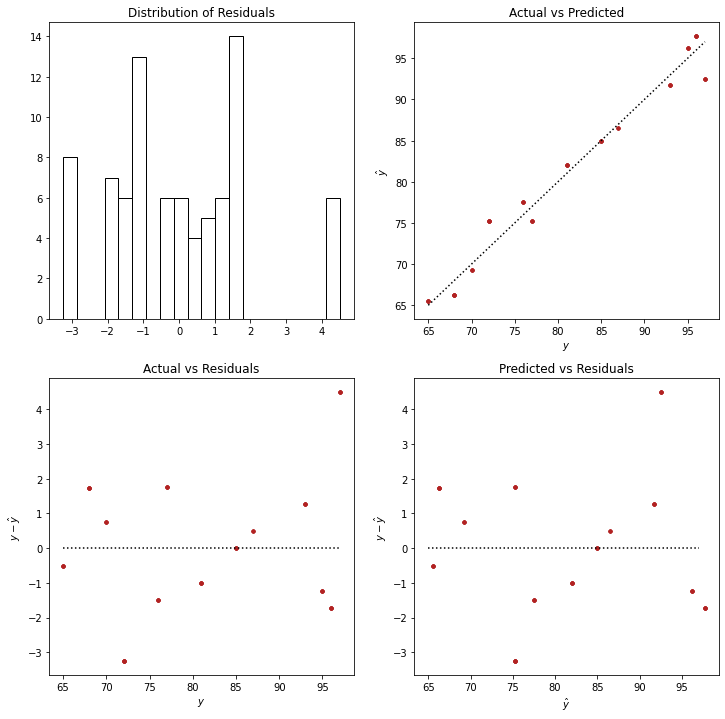

In [16]:
from evaluate import plot_residuals
import matplotlib.pyplot as plt
plot_residuals(predictions.actual, predictions.exam_1)

(<Figure size 864x864 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a4435d0>,
       dtype=object))

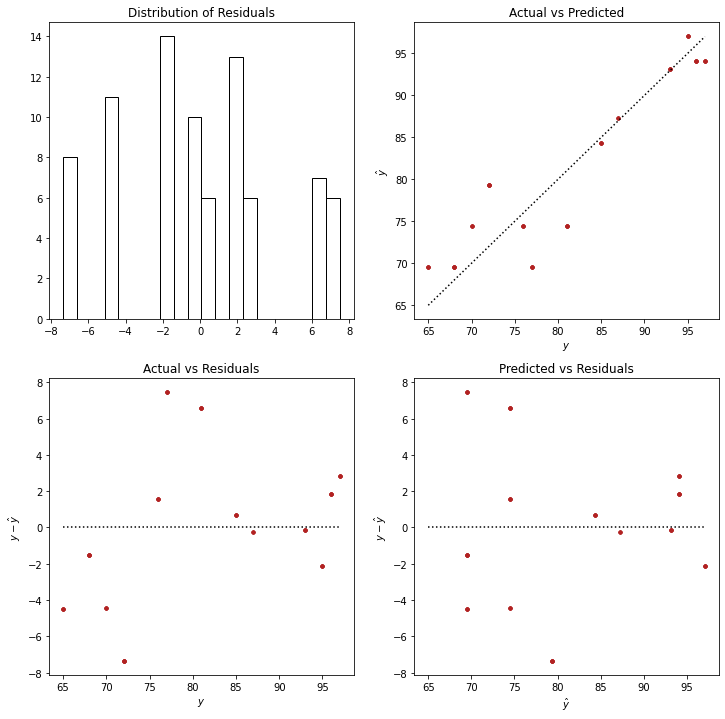

In [17]:
plot_residuals(predictions.actual, predictions.exam_2)

In [24]:
# X must be 2-d
X = train[['exam1', 'exam3']]
# y can be 1-d
y = train.final_grade

# 1. make the thing
lm3 = sklearn.linear_model.LinearRegression()
# 2. fit the thing
lm3.fit(X, y)
# 3. use the thing
predictions['model_3'] = lm3.predict(X)
predictions.head()

,actual,exam_1,exam_2,exam_1_res,exam_2_res,exam1 and exam3,model_3
53,95,96.237567,97.101803,-1.237567,-2.101803,96.373858,96.373858
2,87,86.495674,87.246175,0.504326,-0.246175,86.236212,86.236212
19,93,91.741309,93.159552,1.258691,-0.159552,92.331120,92.331120
64,72,75.255027,79.361673,-3.255027,-7.361673,74.947898,74.947898
5,81,81.999415,74.433859,-0.999415,6.566141,82.193474,82.193474


In [25]:
# calcaulte mean squared error for every column in the df
sklearn.metrics.mean_squared_error(predictions.actual, predictions.model_3)

3.2830855240420203

In [26]:
# plotting residuals
predictions['model_3_res'] = predictions['actual'] - predictions['model_3']
predictions.head()

,actual,exam_1,exam_2,exam_1_res,exam_2_res,exam1 and exam3,model_3,model_3_res
53,95,96.237567,97.101803,-1.237567,-2.101803,96.373858,96.373858,-1.373858
2,87,86.495674,87.246175,0.504326,-0.246175,86.236212,86.236212,0.763788
19,93,91.741309,93.159552,1.258691,-0.159552,92.331120,92.331120,0.668880
64,72,75.255027,79.361673,-3.255027,-7.361673,74.947898,74.947898,-2.947898
5,81,81.999415,74.433859,-0.999415,6.566141,82.193474,82.193474,-1.193474


5. Create a model that uses exam 1 and exam 3 to predict final grade. How does this model compare to your previous ones?

exam_1     3.887265
exam_2    17.632220

Model 3 has a MSE of 3.28 while exam_1 has a MSE of 3.88. 

6. Take your best preforming model and measure its performance on the test data set. How does Performance differ between train and test?

In [27]:
test.head()

,exam1,exam2,exam3,final_grade
24,57,65,75,65
42,83,80,86,85
81,83,80,86,85
72,73,70,75,76
92,98,93,96,95


In [30]:
X_test = test[['exam1', 'exam3']]
y_test = test['final_grade']

In [32]:
lm3.predict(X_test)

array([66.58245528, 84.79017654, 84.79017654, 75.78779766, 96.37385765,
       82.19347368, 74.94789775, 86.2362116 , 92.33111973, 86.2362116 ,
       93.49718816, 86.2362116 , 74.94789775, 86.2362116 , 96.37385765,
       92.33111973, 93.49718816, 97.22915818, 70.64059382, 70.64059382,
       75.78779766])

In [36]:
test_pred = pd.DataFrame({
    'y': test.final_grade
})

In [38]:
test_pred.head()

,y
24,65
42,85
81,85
72,76
92,95


In [40]:
test_pred['model_3_predictions'] = lm3.predict(X_test)

In [41]:
test_pred.head()

,y,model_3_predictions
24,65,66.582455
42,85,84.790177
81,85,84.790177
72,76,75.787798
92,95,96.373858


In [43]:
mean_squared_error(test_pred.y, test_pred.model_3_predictions)

2.2096713057382273

Our scenario continues:

As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

Run all your previous scripts that acquired, prepared, split, and scaled the telco churn data.
Fit 3 different linear models to your data, one with just tenure, one with just monthly_charges, and one with both.
Evaluate the models and your baseline.
Select the model that performed the best, and apply it to your test data.

$\overline{y}$